# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [8]:
#Read in data from source 
df_raw = pd.read_csv("admissions.csv", sep=',')
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [9]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [11]:
len(df_raw)

400

Answer: There are 400 observations in the dataset, although the gre, gpa and prestige fields all have missing data. 

#### Question 2. Create a summary table

In [ ]:
#function

In [12]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The standard deviation is a measure of the dispersion of the data. GRE is measured on a scale of 220 to 800, where GPA is measured on a scale of 1 to 4. Therefore by construction, GRE has a much wider scale over which the data can vary and so we would expect a much higher standard deviation. 

#### Question 4. Drop data points with missing data


In [19]:
df_clean = df_raw.dropna(how='any', axis = 0)

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [30]:
df_clean.notnull().all()

admit       True
gre         True
gpa         True
prestige    True
dtype: bool

Answer: If there were any mising values the above methods would return False in the columns with missing values. 

#### Question 6. Create box plots for GRE and GPA

In [62]:
import seaborn as sns

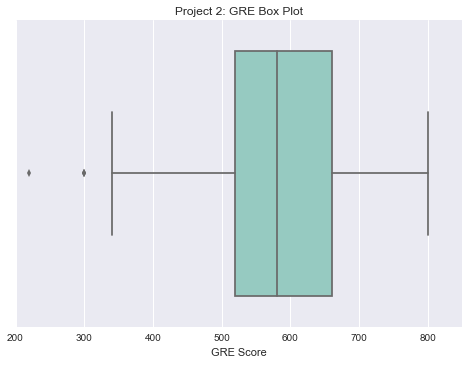

In [63]:
#boxplot 1
sns.boxplot(x=df_clean['gre'], palette="Set3")
plt.title("Project 2: GRE Box Plot")
plt.xlim(200, 850)
plt.xlabel("GRE Score")

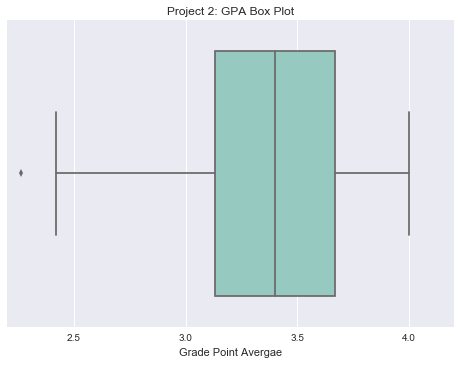

In [64]:
#boxplot 2
sns.boxplot(x=df_clean['gpa'], palette="Set3")
plt.title("Project 2: GPA Box Plot")
plt.xlim(2.2, 4.2)
plt.xlabel("Grade Point Avergae")

#### Question 7. What do this plots show?

Answer: In general box plots show the distribution of quantitative variables. In these particular instances the plots show as follows:

GRE
+ The data are distributed in a range of size approximately 330 to 800
+ There are outliers at the lower end of the distrubution 
+ The data are widely distributed but the middle two quartiles are quitely formed around the mean indicating that there is possibly not much data in the tails.
+ The shape of the plot indicates that there is likely to be a high degree of symmetry around the mean, that could mean that the data approximate a normal distribution. 

GPA
+ The data are distributed in a range of size approximately 2.4 to 4
+ There are outliers at the lower end of the distrubution 
+ The distribution is relatively flatter than the GRE data


#### Question 8. Describe each distribution 

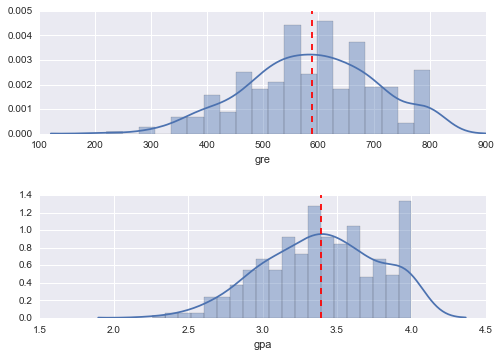

In [94]:
# plot the distribution of each variable 
fig, (ax1, ax2) = plt.subplots(2, 1)
sns.distplot(df_clean['gre'], bins=20, ax=ax1)
sns.distplot(df_clean['gpa'], bins=20, ax=ax2)
ax1.axvline(np.mean(df_clean['gre']), color = 'r', linestyle = 'dashed')
ax2.axvline(np.mean(df_clean['gpa']), color = 'r', linestyle = 'dashed')
fig.subplots_adjust(hspace=.5)


In [96]:
import scipy.stats as stats

In [98]:
stats.skew(df_clean['gre'])

-0.14549459322468605

In [99]:
stats.skew(df_clean['gpa'])

-0.21606859177891757

There is skew in both the gre and the gpa data. The neagitve skew measure indicates more data in the right tail of the distributions

In [100]:
stats.normaltest(df_clean['gre'])

NormaltestResult(statistic=3.8179829306094266, pvalue=0.14822980613776662)

In [101]:
stats.normaltest(df_clean['gpa'])

NormaltestResult(statistic=13.079875560916445, pvalue=0.001444578377229117)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: We cannot reject the null hypothesis that the gre sample is drawn from a normally distributed population. This is because the p-value is larger than is required to reject the null at conventional significance levels. 

We can reject the hypothesis that that gpa are drawn from a normal distribution for the converse reason to above. The returned test statistic is significant at 99%. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

The need depends upon what the data are being used for. If models are being applied that assume the data are normally distributed then some correction to the GPA data may need to be undertaken. Some models such as OLS do not rely on normality assumptions. 

One technique is to transform the data. Finding the right transformation function can be done using the boxcox method. The scipy.stats.boxcox function returns the transformed data and the lambda that was used in the transformation. 

In [122]:
import sklearn
gpa = stats.boxcox(df_clean['gpa'])[0]

In [124]:
#show transformation lambda 
stats.boxcox(df_clean['gpa'])[1]

1.7342767828136079

In [125]:
#skewness is reduced
stats.skew(gpa)

-0.046512152678642095

In [126]:
#cannot reject null that data drawn from normal distribution
stats.normaltest(gpa)

NormaltestResult(statistic=21.783340897646337, pvalue=1.861262491134448e-05)

#### Question 11. Which of our variables are potentially colinear? 

In [135]:
# create a correlation matrix for the data
df_clean.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


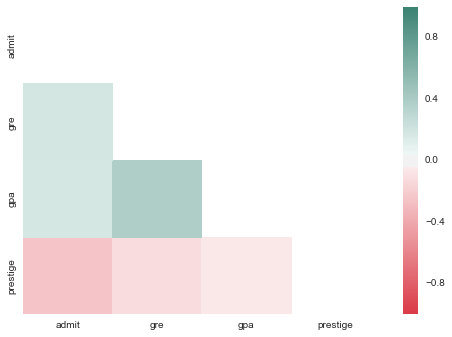

In [151]:
#visual representation # Generate a mask for the upper triangle
sns.set_style("whitegrid")
mask = np.zeros_like(df_clean.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 170, as_cmap=True)
sns.heatmap(df_clean.corr(), mask=mask, cmap=cmap)

#### Question 12. What did you find?

Answer: There are no strong relationships between the variables. The largest coefficient is that of prestige/admit (-0.24), but even this is a weak relationship.

This is surrising as it could be expected that there is a strong relationship between GRE and GPA.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Plan:

+ Take a look at admission rates for schools grouped by prestige 
+ Graph the relatioship and fit a regression line
+ Logistic regression of admit on prestige
+ Add in control variables 

In [176]:
df_clean.groupby('prestige').mean()

,admit,gre,gpa
prestige,,,
1.0,0.540984,611.803279,3.453115
2.0,0.358108,596.621622,3.367365
3.0,0.231405,574.876033,3.432893
4.0,0.179104,570.149254,3.318358


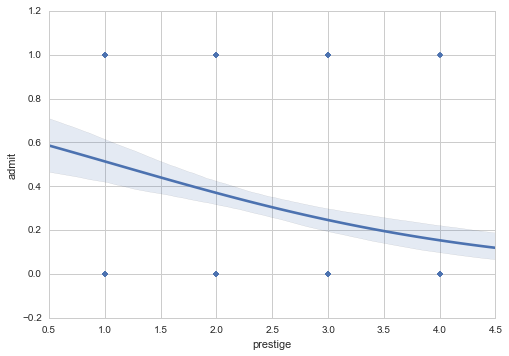

In [204]:
sns.regplot(x='prestige', y='admit', data=df_clean, logistic=True)

In [183]:
import statsmodels.formula.api as smf

In [201]:
log_model = smf.logit(formula='admit ~ prestige', data=df_clean).fit()

Optimization terminated successfully.
         Current function value: 0.594301
         Iterations 5


In [202]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            1
Date:                Mon, 07 Aug 2017   Pseudo R-squ.:                 0.04893
Time:                        16:35:28   Log-Likelihood:                -235.94
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 8.336e-07
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6391      0.307      2.084      0.037         0.038     1.240
prestige      -0.5868      0.124     -4.731      0.000        -0.830    -0.344
==============================================================================
"""

In [207]:
df = pd.get_dummies(df_clean, columns=['prestige'], )

In [213]:
df.columns = ['admit', 'gre', 'gpa', 'prestige1', 'prestige2', 'prestige3', 'prestige4']

In [217]:
log_model2 = smf.logit(formula='admit ~ prestige2 + prestige3 + prestige4', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.593375
         Iterations 5


In [218]:
log_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                            3
Date:                Mon, 07 Aug 2017   Pseudo R-squ.:                 0.05042
Time:                        16:40:53   Log-Likelihood:                -235.57
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.533e-05
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1643      0.257      0.639      0.523        -0.339     0.668
prestige2     -0.7479      0.309     -2.421      0.015        -1.353    -0.142
prestige3     -1.3647      0.335     -4.069      0.000        -2.022    -0.707
prestige4     -1.6867      0.409     -4.121      0.000        -2.489    -0.885
==============================================================================
"""

In [219]:
log_model3 = smf.logit(formula='admit ~ prestige2 + prestige3 + prestige4 + gre + gpa', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


In [220]:
log_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Mon, 07 Aug 2017   Pseudo R-squ.:                 0.08166
Time:                        16:42:13   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.8769      1.142     -3.393      0.001        -6.116    -1.638
prestige2     -0.6801      0.317     -2.146      0.032        -1.301    -0.059
prestige3     -1.3387      0.345     -3.882      0.000        -2.015    -0.663
prestige4     -1.5534      0.417     -3.721      0.000        -2.372    -0.735
gre            0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa            0.7793      0.333      2.344      0.019         0.128     1.431
==============================================================================
"""

#### Question 14. What is your hypothesis? 

Answer: The hypothesis is that as the prestige of the school increses the probability of a student being accepted decreases. 

As admit is a binary variable, a logistic regression model is appropriate. 

The null hypothesis is that the coefficient on the prestige measure (or dummies) is not significantly different from zero. 

The first log model estimates the relationship for the prestige value as a whole. In other words no non-linearity is permitted along the different values of prestige. 

We see that the coefficient is negative and significant at 95%. This means that as prestige rises, the probability of a student being admitted falls. 

To see if this relationship holds accross all the values of prestige the regression is run with a system of dummy variables. The excluded category is prestige1. All the values of prestige have negative coefficients and all are significant at 95% confidence. 

The robustness of the relationship is hinted at by the fact that very little predicitive power of significance is lost when the model controls also for other variables; gre and gpa. While student performance (GPA) has a positive and significant impact on the probability of admission, the coefficients on the prestige variables are largely unchanged and still significant. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

Data can be missing for many reasons. If the probability that a particular datum is missing is not related to the value of that datum then it may be appropriate to replace missing data. 

Two very simple methods are just to replace the missing data with the mean, or the median of the Series. In a data set like the one currently considred (that is multivariate) it may be more relevant to use a multiple imputation technique. However, the mean/median replacement method is shown now:

In [166]:
df_mean   = df_raw.copy()
df_median = df_raw.copy()
for col in df_clean.columns:
    df_mean[col] = df_mean[col].fillna(np.mean(df_clean[col]))
    df_median[col] = df_median[col].fillna(np.median(df_clean[col]))

In [170]:
print df_mean.count()
print df_mean.mean()

admit       400
gre         400
gpa         400
prestige    400
dtype: int64
admit         0.317500
gre         588.039295
gpa           3.390936
prestige      2.486222
dtype: float64


In [171]:
print df_median.count()
print df_median.mean()

admit       400
gre         400
gpa         400
prestige    400
dtype: int64
admit         0.317500
gre         588.000000
gpa           3.390975
prestige      2.485000
dtype: float64


#### 2. Bonus: Log transform the skewed data

In [174]:
logGpa = df_clean['gpa'].apply(lambda x: np.log(x))

#### 3. Advanced: Impute missing data